# Example 1

Below is a short example of how to use the framework using data fetched from `yfinance`.


## Imports

In [1]:
import sys
import datetime
import os

import yfinance as yf
import pandas as pd

from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv("local_path"))


## Fetching data using yfinance

In [2]:
ticker_symbol = "AAPL"

ticker = yf.Ticker(ticker_symbol)

historical_data = ticker.history(period="1y")  # data for the last year

data = historical_data.reset_index()
data.rename(columns = {'Date':'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace = True)
data.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

## Loading using dataloader

In [3]:
from backtesting.backtester.backtester import Backtester

In [27]:
class SimpleBacktester(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        
    def make_decision(self, data_point):
                
        if data_point.close > self.past_data[-1].close:
            decision = 1  # buy the whole portfolio
        else:
            decision = -1  # sell the whole portfolio
        return decision

In [28]:
class BuyandHold(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        self.count = 0
    def make_decision(self, data_point):

        if self.count == 0:
            self.count = 1
            return 1
        return 0

In [29]:
from backtesting.data.data_loader import MarketData

market_data = MarketData(data)  # wrap the DataFrame properly
simple = SimpleBacktester(market_data)
market_data = MarketData(data)  # wrap the DataFrame properly
buy_and_hold = BuyandHold(market_data)
simple_results = simple.run_simulation()
buy_and_hold_results = buy_and_hold.run_simulation()


Error in decision for 2024-06-10 00:00:00-04:00. list index out of range. Holding position.


Text(0.5, 0, 'Time')

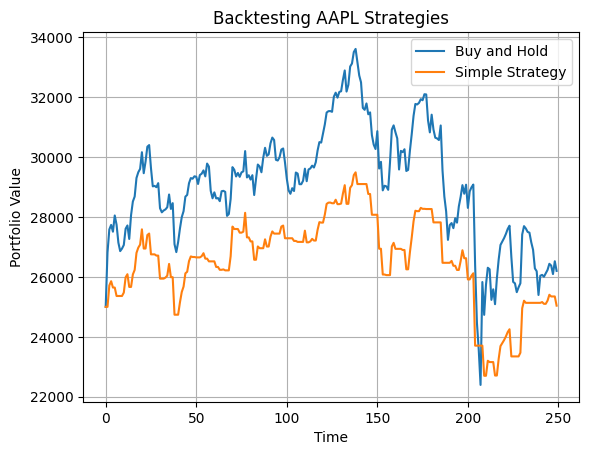

In [30]:
import matplotlib.pyplot as plt
plt.plot(buy_and_hold_results)
plt.plot(simple_results)
plt.legend(["Buy and Hold", "Simple Strategy"])
plt.grid()
plt.ylabel("Portfolio Value")
plt.title(f"Backtesting {ticker_symbol} Strategies")
plt.xlabel("Time")